# Project Name: Hybrid Recommender System

# Goal
Design and Develop Full stack Data Science pipeline to build a Recommender system

# Define Problem Statement
For an online marketplace, the main problem is to increase sales of books and enhance User Experience. One approach to solve this problem is by providing personalized recommendation & improve user experience. This will help users to choose their preferred book from a vast catalog. It is very essential to understand user's book reading behavior, before proceeding to provide recommendation.

# About the dataset
Book crossing is a sharing platform where users from around the globe can share books with strangers as well as track their books. In this dataset, information about books and user rating is provided but Book purchase information is not available so I am assuming that the users who have rated the book may have purchased that book.
This dataset is made available by University of Freiburg at http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

# Data Pull from AWS RDS PostgreSQL DB Instance

In [3]:
# Functions from data_access_object.py
from data_access_object import get_books, get_users, get_ratings

'\n# Functions from data_access_object.py\nfrom data_access_object import get_books, get_users, get_ratings\n '

In [4]:
# Functions from data_transformation.py
from data_transformation import remove_n_Row

In [5]:
# Loading data into dataframe
books = get_books()
users = get_users()
ratings = get_ratings()

'\n# Loading data into dataframe\nbooks = get_books()\nusers = get_users()\nratings = get_ratings()\n\n'

In [6]:
books.info()
books.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271380 entries, 0 to 271379
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   isbn       271380 non-null  object
 1   title      271380 non-null  object
 2   author     271379 non-null  object
 3   year       271380 non-null  object
 4   publisher  271378 non-null  object
 5   link       271380 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


,isbn,title,author,year,publisher,link
0,isbn,title,author,year,publisher,link
1,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
3,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
4,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...


In [7]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  object
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  object
dtypes: object(3)
memory usage: 24.0+ MB


,user_id,isbn,rating
0,252695,312929552,0
1,252695,312961677,7
2,252695,312964846,0
3,252695,312966202,0
4,252695,312967020,0


# Data Processing
For data processing, I have made functions in data_transformation.py file, So applying these functions to process data for analysis.

#### Removing Columns

In [9]:
books.drop('link', axis = 1, inplace = True)

#### Removing first row

In [10]:
# Removing First row as it consists of column name
books = remove_n_Row(0, books)
#users = remove_n_Row(0, users)
#ratings = remove_n_Row(0, ratings)
# done

#### Handling Noise

In [11]:
# column contains some values which are not appropriate.Removing some rows with noise
books = books[books['year'].str[0].str.isdigit() == True]
ratings = ratings[ratings['rating'].str[0].str.isdigit() == True]

In [12]:
books.loc[books.publisher.isnull(),:]

,isbn,title,author,year,publisher
128898,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129045,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [13]:
users.user_id.isna().sum()

0

In [14]:
users = users.dropna()

In [15]:
books.loc[books.isbn == '193169656X','publisher'] = 'Other'
books.loc[books.isbn == '1931696993','publisher'] = 'Other'

In [16]:
#verify
books.loc[books.publisher == 'Other']

,isbn,title,author,year,publisher
128898,193169656X,Tyrant Moon,Elaine Corvidae,2002,Other
129045,1931696993,Finders Keepers,Linnea Sinclair,2001,Other


#### Type Conversion

In [17]:
books.year = books.year.astype(int)
books.isbn = books.isbn.astype(str)
ratings.isbn = ratings.isbn.astype(str)
ratings.rating = ratings.rating.astype(int)
users.user_id = users.user_id.astype(int)

#### Conditions

In [18]:
ratings = ratings.loc[ratings['rating'] > 0]

In [19]:
users.age.unique()

array([ 18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,  24.,
        20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,  37.,
        41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,  13.,
        58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,  40.,
        15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,  56.,
        67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64., 103.,
       104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,  11.,
        77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230., 239.,
        10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,  90.,
       123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97., 219.,
        86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162., 100.,
       156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199., 147.,
       168., 132., 159., 186., 152., 102., 116., 200., 115., 226., 137.,
       207., 229., 138., 109., 105., 228., 183., 20

Age column has NAN and some very high values. Thus replace NAN, Ages below 10 and above 90 does not make sense and thus replacing with NA and then by mean

In [20]:
users.loc[(users.age >90) | (users.age < 10)] = np.nan
users.age = users.age.fillna(users.age.mean())
users.age = users.age.astype(np.int32)
print (users.age.unique())

[18 17 61 26 14 25 19 46 55 32 24 20 34 23 51 31 21 44 30 57 43 37 41 54
 42 50 39 53 47 36 28 35 13 58 49 38 45 62 63 27 33 29 66 40 15 60 79 22
 16 65 59 48 72 56 67 80 52 69 71 73 78 64 12 74 75 76 83 68 11 77 70 81
 10 84 82 90 85 86 87 89 88]


In [21]:
# users have rated some books which are not part of books listed in catalog
# ADDING USER_ID, ISBN, AUTHOR, PUBLICATION,YEAR TO RATINGS DATA

ratings_new = ratings[ratings.isbn.isin(books.isbn)]
ratings_new = ratings_new[ratings_new.user_id.isin(users.user_id)]
user_new = users[users.user_id.isin(ratings.user_id)]


# Exploratory Data Analysis
I will be using 5W2H information gathering technique to understand the problem. Framing questions below before analysis (5W2H Framework)

<b> 
    * What books are rated most of the time?
    * Who are top rated book authors and how many other books have they published?
    * When were the Top 20 books published ?
    * Where are most customers located?
    * Why do some books have low ratings?
    * How are user's ratings correlated to Age?
    * How much do users of highly rated books, rate books from catalog? Have they rated other books similarly?

</b>

In [22]:
# what is the count of total users
users.user_id.nunique(), ratings.user_id.nunique()
print('Out of', users.user_id.nunique(), 'unique users who purchased books, only' ,ratings.user_id.nunique(),'users have provided ratings', end ='.\n')

Out of 166597 unique users who purchased books, only 17579 users have provided ratings.


In [23]:
# how many books are in the catalog? & How many books have received ratings?
books.isbn.nunique(), ratings.isbn.nunique()
print('There are',books.isbn.nunique(),'books in product catalog were only',ratings.isbn.nunique(),'received ratings')

There are 262121 books in product catalog were only 62728 received ratings


In [24]:
books.head(2)

,isbn,title,author,year,publisher
1,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


Most Rated books

In [25]:
ratings_count = pd.DataFrame(ratings.groupby(['isbn'])['rating'].count())
top20 = ratings_count.sort_values('rating',ascending = False).head(20)
top20 = top20.merge(books, left_index= True, right_on = 'isbn')
top20

,rating,isbn,title,author,year,publisher
410,166,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
27,129,971880107,Wild Animus,Rich Shapero,2004,Too Far
752,97,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
524,89,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1107,80,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
2145,74,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
709,67,446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
4826,66,316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books
358,65,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
307,62,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company


Text(0.5, 1.0, 'Most Rated Books by users')

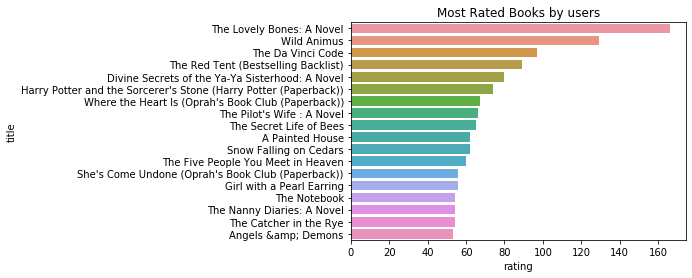

In [26]:
# Visualizing the output
ax = sns.barplot(x='rating', y='title', data=top20)

ax.set_title('Most Rated Books by users')

* Above are the books that have received highest ratings. The Lovely Bones: A Novel written by author Alice Sebold has received most reviews. <p>
* Now I can find amongst these books which book and author has highest rating.
J.K.Rowling was my best author and she wrote complete Harry Potter series. Lets find more books written by her


In [27]:
books.loc[books.author == 'J. K. Rowling'].sort_values('year',ascending = False).head(5)

,isbn,title,author,year,publisher
92768,439358078,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2004,Scholastic Paperbacks
107168,8478888845,Harry Potter y la Ãƒ?rden del FÃƒÂ©nix,J. K. Rowling,2004,Salamandra
79066,1582348286,Harry Potter and the Philosopher's Stone (Iris...,J. K. Rowling,2004,Bloomsbury USA Children's Books
201879,1582348278,Harri Potter maen yr Athronydd (Harry Potter a...,J. K. Rowling,2003,Bloomsbury USA Children's Books
86395,439567610,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic


Text(0.5, 1.0, 'Books Published Year')

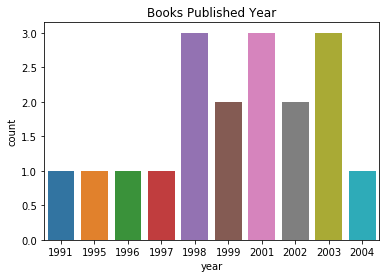

In [28]:
#When were top 20 books published?
top20.year.value_counts()

ax = sns.countplot(x="year", data=top20)
ax.set_title('Books Published Year')

* Most of the books that have received ratings were published between year 1998 and 2003

Let's explore Ratings file, at first i am interested in finding rating distribution. The rating column is categorical so i will use bar chart


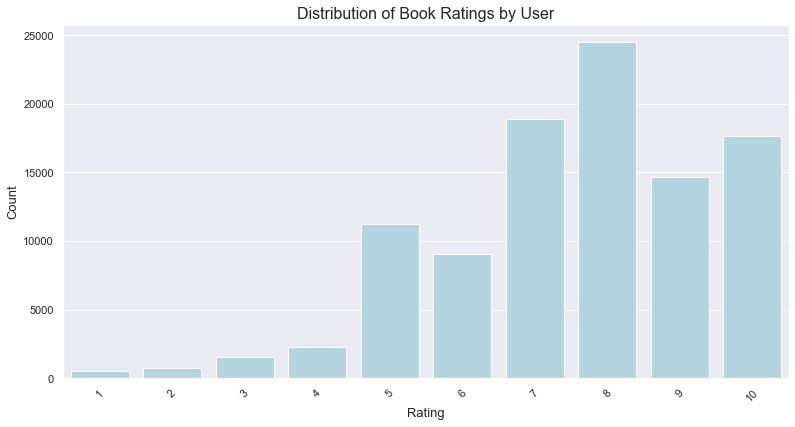

In [29]:
frequency = ratings.rating.value_counts().reset_index()
frequency.columns = ['rating','count']

# visualizing
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = frequency['rating']
y = frequency['count']
g = sns.barplot(x, y, color= 'lightblue')
g.set_title("Distribution of Book Ratings by User", fontsize = 16)
g.set_xlabel("Rating", fontsize = 13)
g.set_ylabel("Count", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

In [30]:
frequency.rating.mean(), frequency.rating.std()

(5.5, 3.0276503540974917)

* Based on this analysis we can deduce that there are many books whose rating is zero, so the data distribution is biased here.
* Out of all ratings received, the mean ratings given by user is 5.5 with standard deviation of 3.02. There are x number of ratings above 1 standard devaiation of mean

Lets find age distribution as users of similar Age tens to read similar books

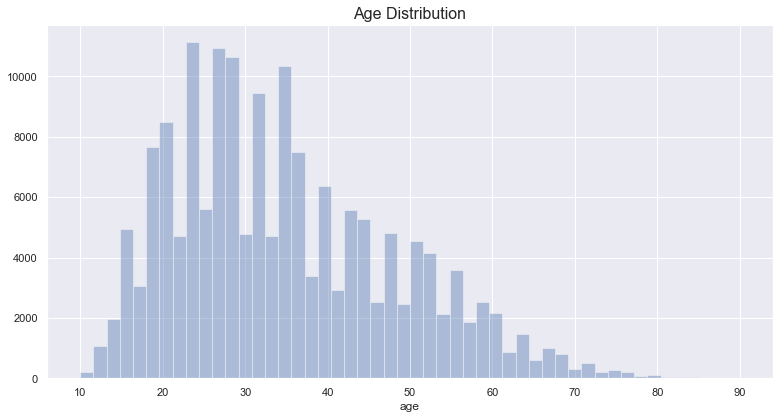

In [31]:
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid')
sns.distplot(users.age, kde= False)
plt.title("Age Distribution", fontsize = 16);

In [32]:
#User Age and Rating correlation
user_new.head()

,user_id,location,age
9,10.0,"albacete, wisconsin, spain",26
18,19.0,"weston, ,",14
41,42.0,"appleton, wisconsin, usa",17
43,44.0,"black mountain, north carolina, usa",51
50,51.0,"renton, washington, usa",34


In [33]:
user_new.dtypes
user_new.age = user_new.age.astype(int,copy= True)


C:\Users\sush1\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
ratings.dropna()
ratings.user_id = ratings.user_id.astype(int,copy= True)
ratings.dtypes


user_id     int32
isbn       object
rating      int32
dtype: object

In [35]:
age_rating = user_new.merge(ratings, on = 'user_id')
age_rating.head()

,user_id,location,age,isbn,rating
0,10.0,"albacete, wisconsin, spain",26,8477024456,6
1,19.0,"weston, ,",14,375759778,7
2,42.0,"appleton, wisconsin, usa",17,553582747,7
3,44.0,"black mountain, north carolina, usa",51,440223571,8
4,51.0,"renton, washington, usa",34,440225701,9


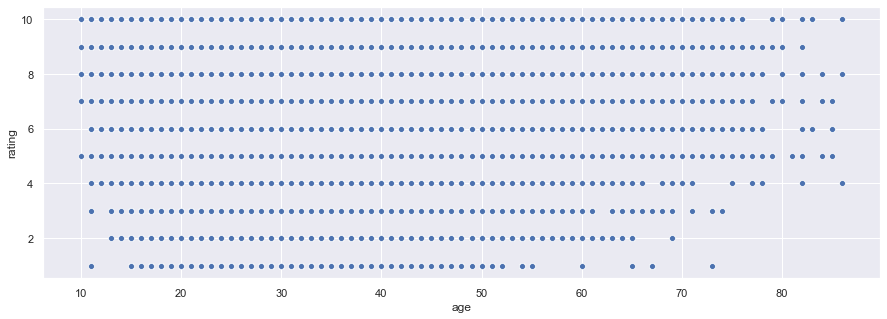

In [36]:
sns.set(rc={'figure.figsize':(15,5)})

ax=sns.scatterplot(x='age',y='rating', data=age_rating)

* From above scatterplot, I could make an assumption that low ratings are generally common amongst age group ranging between 20 and 50
* Age group above 60 have mostly rated book above 5

Find users who both have rated book X. How did they rate book Y?<p>
Case: Find 2 users who have rated book written by author J. K. Rowling. Now lets see how both users rated The Lovely Bones: A Novel 

In [37]:
# find ISBN of J. K. Rowling and The Lovely Bones: A Novel
books.head()

,isbn,title,author,year,publisher
1,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
4,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
5,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [38]:
books.loc[(books['author'] == 'J. K. Rowling')] 
# ISBN 059035342X

,isbn,title,author,year,publisher
2145,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
2811,590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic
3461,439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
3841,439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic
3916,613329740,Quidditch Through the Ages,J. K. Rowling,2001,Sagebrush Education Resources
...,...,...,...,...,...
213714,439567629,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
234621,1594130000,Harry Potter and the Sorcerer's Stone,J. K. Rowling,2003,Large Print Press
234627,439294827,Harry Potter and the Sorcerer's Stone: A Delux...,J. K. Rowling,2001,Scholastic
251250,847888663X,Harry Potter y El Caliz de Fuego,J. K. Rowling,2001,Lidiun


In [39]:
# search for book with title
books.loc[(books['title'] == 'The Lovely Bones: A Novel')] 
# answer: ISBN 316666343

,isbn,title,author,year,publisher
410,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"


In [40]:
#FIND USER WHO HAVE RATED THIS BOOK
x = ratings.loc[(ratings['isbn'] == '059035342X') | (ratings['isbn'] == '316666343')]
x

,user_id,isbn,rating
1596,252829,059035342X,10
2484,253005,316666343,7
2951,253310,316666343,9
3058,253386,316666343,7
3785,253626,316666343,7
...,...,...,...
256286,36265,316666343,9
258933,36609,316666343,9
259824,36802,059035342X,8
259834,36807,316666343,6


10560, 11676, 35859, 22625, 31393 user_ids have rated both the books.

In [42]:
x.query(('user_id==(10560,11676,35859,22625)'))

,user_id,isbn,rating
133739,10560,316666343,8
133807,10560,059035342X,10
139434,11676,316666343,5
144218,11676,059035342X,10
190709,22625,316666343,10
190805,22625,059035342X,10
250166,35859,316666343,6
252879,35859,059035342X,10


* 'Harry Potter and the Sorcerer's Stone' by J.K. Rowling has received 10 star rating by all the 4 users while 'The Lovely Bones: A Novel' received average rating of 7.5

<b>Insights:</b>

As expected the books that are rated most number of time are well know one's namely 'The Lovely Bones: A Novel', 'The Da Vinci Code', 'Harry Potter' and many more..<p>
Top authors are Alice Sebold and Rick Shapero and these books were published between 1998 and 2003. <p>
Ratings: Rating distribution show a positive trend with bar chart skewed to left which gives a good news that our catalog has amazing collection. <p>
Age: Most of the ratings are received by middle aged people as the distribution is a proper bell curve. <p>For low rated books generally such ratings come amongst age group between 20 to 50.<p> Age group above 60 have mostly rated books above 5. <p>After comparing how the ratings for books change for users, it can be seen that we can divide users easily into segments and find similar users as users who read similar books have nearly similar choices and views.<p>